In [1]:
from sklearn.datasets import fetch_20newsgroups
import pickle
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import text
from nltk import pos_tag
import numpy as np
np.random.seed(42)
import random
random.seed(42)
import nltk
from numpy import linalg as LA
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import LinearSVC
from sklearn.decomposition import NMF


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#from sklearn import metrics
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import GaussianNB as GNB

from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.svm import SVC

from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


Question 1

In [2]:
newsgroups_train = fetch_20newsgroups(subset='train')

print(list(newsgroups_train.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


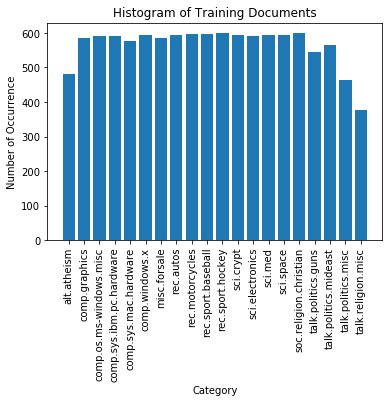

In [3]:
category, total = np.unique(newsgroups_train.target, return_counts=True)
plt.bar(category,total, tick_label=newsgroups_train.target_names)
plt.title('Histogram of Training Documents')
plt.xlabel('Category')
plt.ylabel('Number of Occurrence')
plt.xticks(rotation='vertical')
plt.show()

In [4]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']

train_dataset =fetch_20newsgroups(subset='train',categories=categories,shuffle= True,random_state=42)
test_dataset=fetch_20newsgroups(subset= 'test',categories=categories,shuffle= True,random_state=42)

target_names = train_dataset.target_names

In [6]:
category_item_count = [len(fetch_20newsgroups(categories = [name])['data']) for name in target_names]

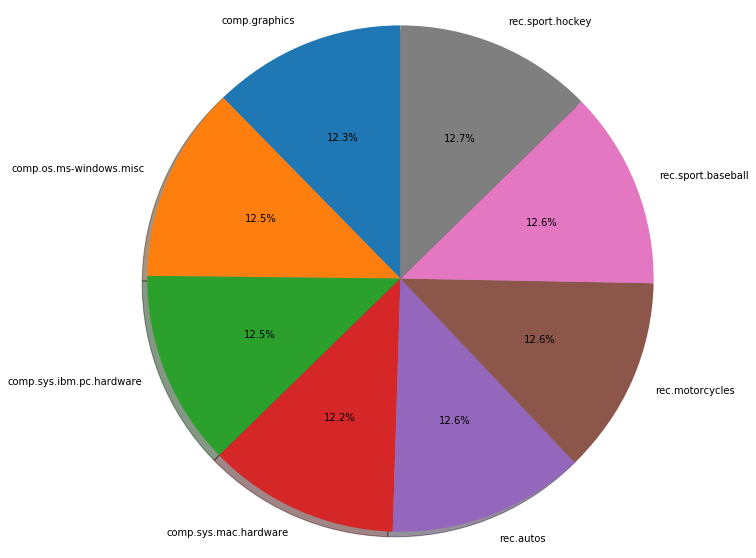

In [7]:
#plt.figure(figsize = (10,10))
fig, ax = plt.subplots(figsize = (10,10))
ax.pie(category_item_count, labels=target_names, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Text(0.5, 0, 'number of training documents')

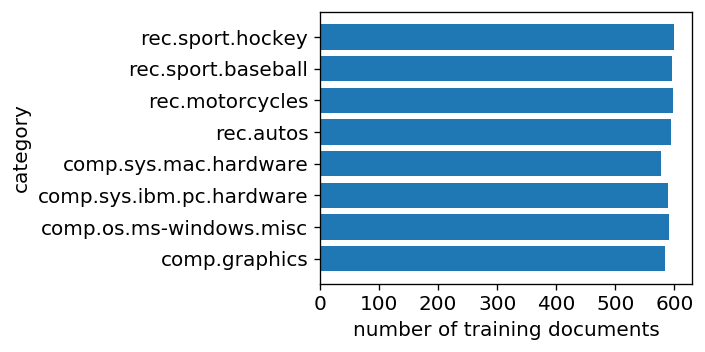

In [8]:
#plot histogram
plt.figure(figsize=(4,3),dpi=120)
plt.hist(train_dataset['target'],bins=np.arange(9)-0.5,orientation='horizontal',align='mid',rwidth=0.8)
plt.yticks(np.unique(train_dataset['target']),train_dataset['target_names'],fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('category',fontsize=12)
plt.xlabel('number of training documents',fontsize=12)

In [9]:
# Question 2

In [10]:
wnl = nltk.wordnet.WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'
    
def lemmatize_sent_demo(text):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(nltk.word_tokenize(text))]
def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

def lemmatize_rmv_num(text):
    # Text input is string, returns array of lowercased strings(words).
    lemmatized_text = []
    for word, tag in pos_tag(nltk.word_tokenize(text)):
        if not word.isdigit():
            lemmatized_text.append(wnl.lemmatize(word.lower(), pos=penn2morphy(tag))) 
    return lemmatized_text

In [11]:
analyzer = CountVectorizer().build_analyzer()
def remove_num(doc):
    return [word for word in lemmatize_sent(analyzer(doc)) if not word.isdigit()]

def remove_num_without_lemmatize(doc):
    return [word for word in (analyzer(doc)) if not word.isdigit()]

vectorizer = CountVectorizer(analyzer=remove_num,stop_words = 'english',min_df = 3)
vectorizer

CountVectorizer(analyzer=<function remove_num at 0x00000297CE6AF708>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

Question 3.

In [12]:
tfidf_transformer = TfidfTransformer(smooth_idf=False)

X_train_count = vectorizer.fit_transform(train_dataset.data)
X_train_tfidf=tfidf_transformer.fit_transform(X_train_count)
X_test_tfidf = tfidf_transformer.transform(vectorizer.transform(test_dataset.data))
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(4732, 16600)
(3150, 16600)


In [13]:
svd = TruncatedSVD(n_components=50, random_state=42)
X_train_reduced_lsi = svd.fit_transform(X_train_tfidf)
X_train_recon_lsi = svd.inverse_transform(X_train_reduced_lsi)
residual_LSI = LA.norm(X_train_tfidf-X_train_recon_lsi)**2 # note LA norm is square root of what we want
print(residual_LSI)

3903.75638324622


In [14]:
X_test_reduced_lsi = svd.transform(X_test_tfidf)
print(X_test_reduced_lsi.shape)

(3150, 50)


In [15]:
NMF_model = NMF(n_components=50, init='random', random_state=42)
X_train_reduced_NMF = NMF_model.fit_transform(X_train_tfidf)
X_train_recon_NMF = NMF_model.inverse_transform(X_train_reduced_NMF)
residual_NMF = LA.norm(X_train_tfidf-X_train_recon_NMF)**2 # note LA norm is square root of what we want
print(residual_NMF) # slighty larger variance

3947.570381525501


In [16]:
X_test_reduced_NMF = NMF_model.transform(X_test_tfidf)
print(X_test_reduced_NMF.shape)

(3150, 50)


In [17]:
#train_dataset.
# 0-3 indicate comp, 4-7 indicate rec, we only classify these two categories
binary_training_label = []
binary_testing_label = []
for i in range(len(train_dataset.data)):
    if 'comp' in train_dataset.filenames[i]:
        binary_training_label.append(0)
    else:
        binary_training_label.append(1)
        
for i in range(len(test_dataset.data)):
    if 'comp' in test_dataset.filenames[i]:
        binary_testing_label.append(0)
    else:
        binary_testing_label.append(1)

In [18]:
def plot_roc(y_train, scores):
    fig, ax = plt.subplots()
    
    fpr, tpr, t = metrics.roc_curve(y_train, scores)
    
    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)
        
def plot_confM(Estimator,X_test,Y_test,class_names):
    disp = plot_confusion_matrix(Estimator, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 display_labels=class_names,
                                 normalize=None,xticks_rotation=90,values_format='d')
    disp.ax_.set_title('Confusion Matrix')
    
# -1-> comp, 1->rec
def confusion_matrix_parameters(true_label,predicted_label):
    print('Accuracy:', metrics.accuracy_score(true_label, predicted_label))
    print('Precision:', metrics.precision_score(true_label, predicted_label))
    print('Recall:', metrics.recall_score(true_label, predicted_label))
    print('F1:', metrics.f1_score(true_label, predicted_label))
    

Question 4.

Accuracy: 0.9704761904761905
Precision: 0.9617520049352252
Recall: 0.980503144654088
F1: 0.971037060105886


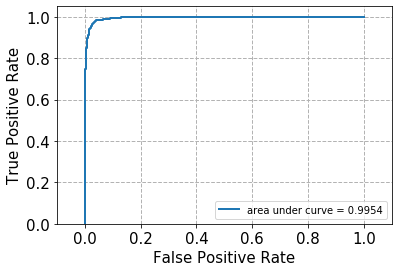

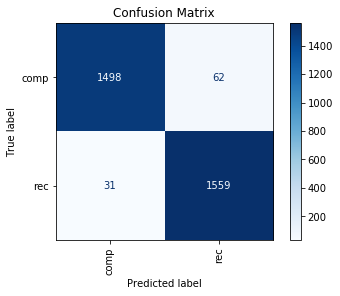

In [19]:
#LinearSVC().fit(X_train_tfidf, twenty_train.target).predict(X_new_tfidf)

#SVM hard margin classifier and LSI for dimensionality reduction
clf_SVM_hard_lsi = SVC(C= 1000,probability=True, kernel='linear') #hard margin
clf_SVM_hard_lsi.fit(X_train_reduced_lsi,binary_training_label)

SVM_prediction_hard_lsi = clf_SVM_hard_lsi.predict(X_test_reduced_lsi)
SVM_prediction_hard_score_lsi = clf_SVM_hard_lsi.decision_function(X_test_reduced_lsi)

plot_roc(binary_testing_label,SVM_prediction_hard_score_lsi) #roc

plot_confM(clf_SVM_hard_lsi,X_test_reduced_lsi,binary_testing_label,['comp','rec']) #confusion matrix

confusion_matrix_parameters(binary_testing_label,SVM_prediction_hard_lsi)


Accuracy: 0.5047619047619047
Precision: 0.5047619047619047
Recall: 1.0
F1: 0.6708860759493671


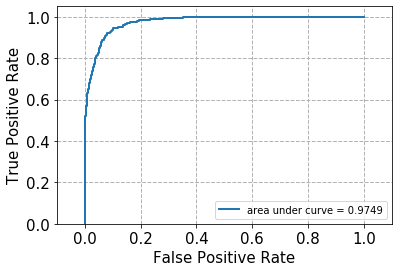

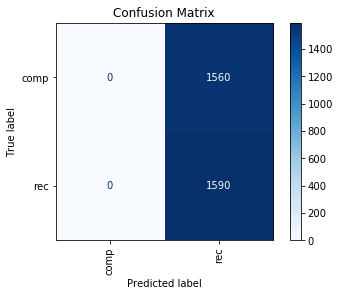

In [20]:
#SVM soft margin classifier and dimensionality reduction using LSI
clf_SVM_soft_lsi = SVC(C= 0.0001,probability=True, kernel='linear') #soft margin
clf_SVM_soft_lsi.fit(X_train_reduced_lsi,binary_training_label)

SVM_prediction_soft_lsi = clf_SVM_soft_lsi.predict(X_test_reduced_lsi)
SVM_prediction_soft_score_lsi = clf_SVM_soft_lsi.decision_function(X_test_reduced_lsi)

plot_roc(binary_testing_label,SVM_prediction_soft_score_lsi) #roc

plot_confM(clf_SVM_soft_lsi,X_test_reduced_lsi,binary_testing_label,['comp','rec']) #confusion matrix

confusion_matrix_parameters(binary_testing_label,SVM_prediction_soft_lsi)

In [21]:
def best_param(model,kargs,train_set,test_set,train_label,test_label):
    k_list=np.arange(-3,4,dtype='float')
    scores=[]
    for k in k_list:
        C=10**k
        clf=model(C=C,**kargs)
        # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        # https://scikit-learn.org/stable/modules/cross_validation.html
        scores.append(np.mean(cross_val_score(clf, train_set, train_label, 
                                              cv=5, scoring='accuracy')))
    k_best=k_list[np.argmax(np.array(scores))]
    plt.plot(k_list,scores,label='best k is {:.4f}, C={:.4f}'.format(k_best, 10**k_best))
    plt.xlabel('k')
    plt.ylabel('5-fold mean accuracy')
    plt.legend()
    #plt.title(str(model))
    C_best = 10**k_best
    clf=model(C=10**k_best,**kargs)
    clf.fit(train_set,train_label)
    
    clf_prediction = clf.predict(test_set)
    clf_prediction_score = clf.decision_function(test_set)

    plot_roc(test_label,clf_prediction_score) #roc
    plot_confM(clf,test_set,test_label,['comp','rec']) #confusion matrix
    confusion_matrix_parameters(test_label,clf_prediction)
    return C_best


Accuracy: 0.9704761904761905
Precision: 0.9617520049352252
Recall: 0.980503144654088
F1: 0.971037060105886


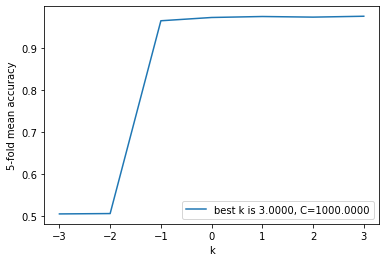

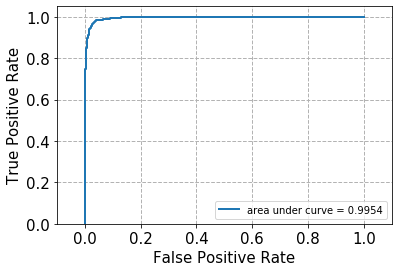

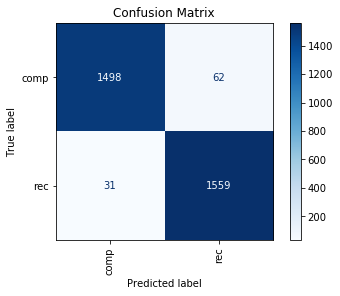

In [22]:
# Dimensionality reduction using LSI
model=SVC # Linear SVC CV
kargs={'probability': True,'kernel':'linear'}
C_best_svm = best_param(model,kargs,X_train_reduced_lsi,X_test_reduced_lsi,binary_training_label,binary_testing_label)

In [23]:
model = SVC(probability=True, kernel='linear')
parameters = {'C':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
model_grid = GridSearchCV(model,parameters,cv=5)
model_grid.fit(X_train_reduced_lsi,binary_training_label)
pd.DataFrame(model_grid.cv_results_)[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.001,0.504861
1,0.01,0.505706
2,0.1,0.965343
3,1,0.973160
4,10,0.975486
5,100,0.974006
6,1000,0.976120


Question 5

Accuracy: 0.9720634920634921
Precision: 0.9653035935563816
Recall: 0.979874213836478
F1: 0.9725343320848939


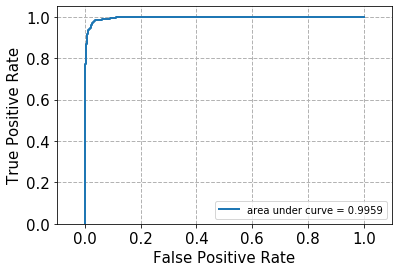

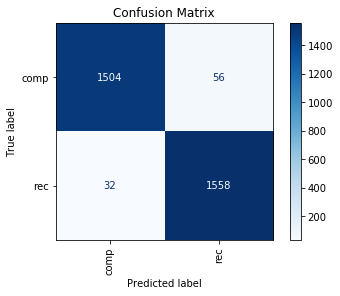

In [24]:
# Logistic regression without regulization and LSI : C is made extremely large
from sklearn.linear_model import LogisticRegression as LR
lr_no_lsi=LR(penalty='l2',C=10**15,max_iter= 10000)
lr_no_lsi.fit(X_train_reduced_lsi,binary_training_label)
scores_lr_no_lsi=lr_no_lsi.decision_function(X_test_reduced_lsi)
pred_lr_no_lsi=lr_no_lsi.predict(X_test_reduced_lsi)

plot_roc(binary_testing_label,scores_lr_no_lsi) #roc

plot_confM(lr_no_lsi,X_test_reduced_lsi,binary_testing_label,['comp','rec']) #confusion matrix

confusion_matrix_parameters(binary_testing_label,pred_lr_no_lsi)

Accuracy: 0.9704761904761905
Precision: 0.9606153846153846
Recall: 0.9817610062893082
F1: 0.971073094867807


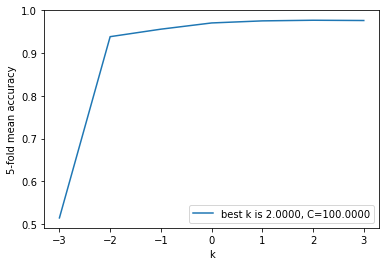

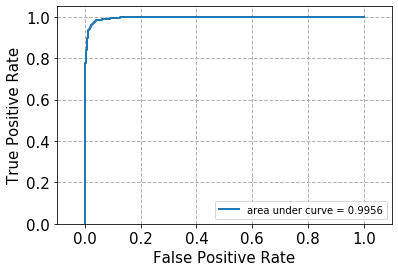

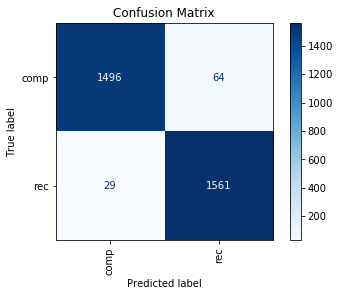

In [25]:
model=LR  #L2 regularization
kargs={'penalty':'l2','max_iter': 10000}
C_best_LR_l2 = best_param(model,kargs,X_train_reduced_lsi,X_test_reduced_lsi,binary_training_label,binary_testing_label)

In [26]:
model_LR_l2 = LR(penalty='l2',max_iter=10000)
parameters = {'C':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
model_LR_l2_grid = GridSearchCV(model_LR_l2,parameters,cv=5)
model_LR_l2_grid.fit(X_train_reduced_lsi,binary_training_label)
pd.DataFrame(model_LR_l2_grid.cv_results_)[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.001,0.514159
1,0.01,0.938718
2,0.1,0.956256
3,1,0.970836
4,10,0.975697
5,100,0.977176
6,1000,0.976542


Accuracy: 0.9720634920634921
Precision: 0.9653035935563816
Recall: 0.979874213836478
F1: 0.9725343320848939


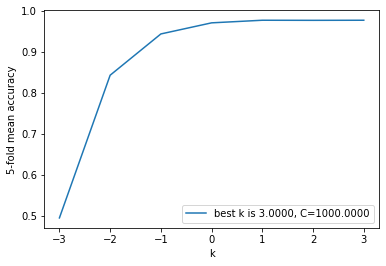

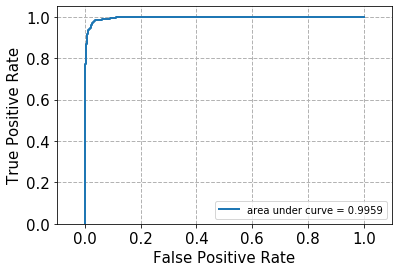

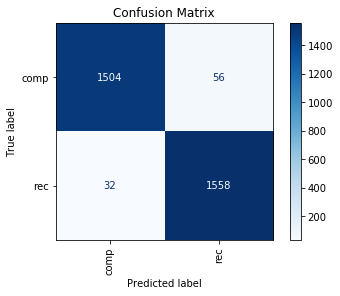

In [27]:
model=LR  # "L1" regulization
kargs={'penalty':'l1','solver':'liblinear'}
C_best_LR_l1 = best_param(model,kargs,X_train_reduced_lsi,X_test_reduced_lsi,binary_training_label,binary_testing_label)

In [28]:
model_LR_l1 = LR(penalty='l1',solver='liblinear')
parameters = {'C':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
model_LR_l1_grid = GridSearchCV(model_LR_l1,parameters,cv=5)
model_LR_l1_grid.fit(X_train_reduced_lsi,binary_training_label)
pd.DataFrame(model_LR_l1_grid.cv_results_)[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.001,0.495139
1,0.01,0.842986
2,0.1,0.943575
3,1,0.970625
4,10,0.976965
5,100,0.976754
6,1000,0.976965


Question 6

Accuracy: 0.9136507936507936
Precision: 0.878735632183908
Recall: 0.9616352201257862
F1: 0.9183183183183183


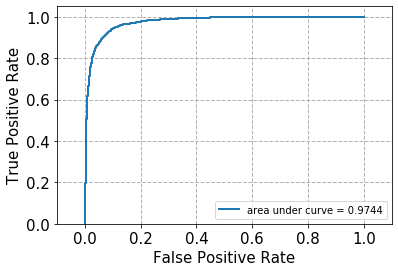

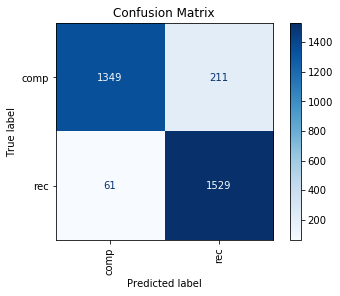

In [29]:
# Naive Bayes part
gnb_lsi=GNB()

gnb_lsi.fit(X_train_reduced_lsi,binary_training_label)
scores_gnb_lsi=gnb_lsi.predict_log_proba(X_test_reduced_lsi)[:,1]
pred_gnb_lsi=gnb_lsi.predict(X_test_reduced_lsi)

plot_roc(binary_testing_label,scores_gnb_lsi) #roc

plot_confM(gnb_lsi,X_test_reduced_lsi,binary_testing_label,['comp','rec']) #confusion matrix

confusion_matrix_parameters(binary_testing_label,pred_gnb_lsi)

Question 7

In [30]:
# Remove headers and footers

train_dataset_rmv_hf =fetch_20newsgroups(subset='train',categories=categories,
                                         shuffle= True,random_state=42,remove=('headers','footers'))
test_dataset_rmv_hf=fetch_20newsgroups(subset= 'test',categories=categories,
                                shuffle= True,random_state=42,remove=('headers','footers'))

# Keep headers and footers

train_dataset_keep_hf =fetch_20newsgroups(subset='train',categories=categories,
                                         shuffle= True,random_state=42)
test_dataset_keep_hf=fetch_20newsgroups(subset= 'test',categories=categories,
                                shuffle= True,random_state=42)

train_label_rmv_hf = []
test_label_rmv_hf = []
for i in range(len(train_dataset_rmv_hf.data)):
    if 'comp' in train_dataset_rmv_hf.filenames[i]:
        train_label_rmv_hf.append(0)
    else:
        train_label_rmv_hf.append(1)
        
for i in range(len(test_dataset_rmv_hf.data)):
    if 'comp' in test_dataset_rmv_hf.filenames[i]:
        test_label_rmv_hf.append(0)
    else:
        test_label_rmv_hf.append(1)
        
train_label_keep_hf = []
test_label_keep_hf = []
for i in range(len(train_dataset_keep_hf.data)):
    if 'comp' in train_dataset_keep_hf.filenames[i]:
        train_label_keep_hf.append(0)
    else:
        train_label_keep_hf.append(1)
        
for i in range(len(test_dataset_keep_hf.data)):
    if 'comp' in test_dataset_keep_hf.filenames[i]:
        test_label_keep_hf.append(0)
    else:
        test_label_keep_hf.append(1)

In [31]:
# Remove header and footer and lemmatize
train_dataset_lemmatized_rmv_hf = []
for item in train_dataset_rmv_hf.data:
    train_dataset_lemmatized_rmv_hf.append(' '.join(lemmatize_rmv_num(item)))
    
test_dataset_lemmatized_rmv_hf = []
for item in test_dataset_rmv_hf.data:
    test_dataset_lemmatized_rmv_hf.append(' '.join(lemmatize_rmv_num(item)))
    
# Keep header and footer and lemmatize
train_dataset_lemmatized_keep_hf = []
for item in train_dataset_keep_hf.data:
    train_dataset_lemmatized_keep_hf.append(' '.join(lemmatize_rmv_num(item)))
    
test_dataset_lemmatized_keep_hf = []
for item in test_dataset_keep_hf.data:
    test_dataset_lemmatized_keep_hf.append(' '.join(lemmatize_rmv_num(item)))

In [32]:
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory
from sklearn.pipeline import Pipeline

cachedir = mkdtemp()
memory = Memory(cachedir=cachedir, verbose=10)

pipeline = Pipeline([
    ('vectorize', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50,random_state=42)),
    ('clf', GNB()),
],
memory=memory
)

# C_best_svm = 10
# C_best_LR_l1 = 10
# C_best_LR_l2 = 100
min_df_option = [3,5]
LR_penalty_option = ['l1','l2']

param_grid = [
     {
         'vectorize__min_df': min_df_option,
         'reduce_dim': [TruncatedSVD(n_components=50), NMF(n_components=50)],
         'clf': [SVC(C=C_best_svm),GNB()]
     },
     {
         'vectorize__min_df': min_df_option,
         'reduce_dim': [TruncatedSVD(n_components=50), NMF(n_components=50)],
         'clf': [LR(C=C_best_LR_l1,solver='liblinear')],
         'clf__penalty':['l1']
     },
    {
         'vectorize__min_df': min_df_option,
         'reduce_dim': [TruncatedSVD(n_components=50), NMF(n_components=50)],
         'clf': [LR(C=C_best_LR_l2,max_iter=10000)],
         'clf__penalty':['l2']
     }
]
grid1 = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid2 = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid3 = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid4 = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')

# Fit REMOVED HEADERS AND FOOTERS, LEMMATIZED

grid1.fit(train_dataset_lemmatized_rmv_hf, train_label_rmv_hf)

print('Fit Grid 1')

# Fit REMOVED HEADERS AND FOOTERS, NOT LEMMATIZED
grid2.fit(train_dataset_rmv_hf.data, train_label_rmv_hf)

print('Fit Grid 2')

# Fit KEPT HEADERS AND FOOTERS, LEMMATIZED
grid3.fit(train_dataset_lemmatized_keep_hf, train_label_keep_hf)

print('Fit Grid 3')

# Fit KEPT HEADERS AND FOOTERS, NOT LEMMATIZED
grid4.fit(train_dataset_keep_hf.data, train_label_keep_hf)

print('Fit Grid 4')

rmtree(cachedir)

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Anaconda3\envs\ece219_1\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='C:\\Users\\rahul\\AppData\\Local\\Temp\\tmp_b3mwaqx'", use "location='C:\\Users\\rahul\\AppData\\Local\\Temp\\tmp_b3mwaqx'" instead.
  import sys


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'what hardware do plan to run on ? workstation or pc ? cost level ? run-time '
  'licensing need ? bob',
  'i use hp deskjet with orange micros grappler l on system6.0.5 . but now i '
  'update system 6.0.5 to system7 with kanji-talk 7.1 , then i can not print '
  'by my deskjet . be the grappler l old ? can i use deskjet on system7 ? '
  'please tell me how to use deskjet on system7 . thank you',
  'ha anyone use th

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.12s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.8s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x12487 sparse matrix of type '<class 'numpy.int64'>'
	with 219879 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.09s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.8s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x12232 sparse matrix of type '<class 'numpy.int64'>'
	with 216546 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.14s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.9s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x12745 sparse matrix of type '<class 'numpy.int64'>'
	with 220916 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.12s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.8s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x12373 sparse matrix of type '<class 'numpy.int64'>'
	with 219747 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.12s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.8s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x12527 sparse matrix of type '<class 'numpy.int64'>'
	with 220456 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 0.72s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.7s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x7540 sparse matrix of type '<class 'numpy.int64'>'
	with 203250 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.7s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x7486 sparse matrix of type '<class 'numpy.int64'>'
	with 200630 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 0.73s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.8s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x7632 sparse matrix of type '<class 'numpy.int64'>'
	with 203662 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.7s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x7645 sparse matrix of type '<class 'numpy.int64'>'
	with 203768 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 0.80s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.7s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x7677 sparse matrix of type '<class 'numpy.int64'>'
	with 204101 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

________________________________________________fit_transform_one - 8.1s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\b76e48f11238da5fcedadebf99ca78d5
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\63f6081428c9885acf78eebd9d175dab
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3786x12527 sparse matrix of type '<class 'numpy.float64'>'
	with 2

________________________________________________fit_transform_one - 7.3s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\b45d8b110cbbeb4d6ad9cf230aee30af
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\14faa162d4ebd8cd54764bfeee583fc5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3786x7677 sparse matrix of type '<class 'numpy.float64'>'
	with 20

___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\9f7fc0718f04114f661e1d0f4c916aeb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\0ad6d25a64e946449e129df524a46df7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\b45d8b110cbbeb4d6ad9cf230aee30af
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_tra

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\b45d8b110cbbeb4d6ad9cf230aee30af
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\14faa162d4ebd8cd54764bfeee583fc5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\4a45d459951bb19502acc476b2270d0d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\18063ca30013044e4959eb8db5b2fc96
___________________________________fi

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\b7521b36d92f84fa89ff3417bb5323ea
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\18063ca30013044e4959eb8db5b2fc96
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\b0465ddc625ee807294940a2cb914a0e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_tra

[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\b0465ddc625ee807294940a2cb914a0e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\f5823a821a1748d7a37b1dceb6bd9a2c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\388a617c7880dd00ee7cb7f04008cdee
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\aa66b6a9c28eeb45b681f4028352e10a
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\388a617c7880dd00ee7cb7f04008cdee
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\aa66b6a9c28eeb45b681f4028352e10a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\d74c91e10c672505ab68ef944640c149
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\95d68226b1f55eed891fd2f1f0e18027
___________________________________fi

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.31s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <4732x14695 sparse matrix of type '<class 'numpy.int64'>'
	with 279380 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.28s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x14648 sparse matrix of type '<class 'numpy.int64'>'
	with 241382 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x14377 sparse matrix of type '<class 'numpy.int64'>'
	with 237491 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.29s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x14871 sparse matrix of type '<class 'numpy.int64'>'
	with 242141 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.28s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x14537 sparse matrix of type '<class 'numpy.int64'>'
	with 241052 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.29s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x14675 sparse matrix of type '<class 'numpy.int64'>'
	with 241558 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 0.90s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x9052 sparse matrix of type '<class 'numpy.int64'>'
	with 222536 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 0.82s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x8964 sparse matrix of type '<class 'numpy.int64'>'
	with 219298 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 0.91s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x9147 sparse matrix of type '<class 'numpy.int64'>'
	with 222851 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 0.93s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x9180 sparse matrix of type '<class 'numpy.int64'>'
	with 222953 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 0.86s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x9172 sparse matrix of type '<class 'numpy.int64'>'
	with 223022 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

_______________________________________________fit_transform_one - 13.9s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\669dfa584690ffa782f62bbc2eee2822
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\f33d22c1e548a0b7fc969bc5b8c38c0b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3786x14675 sparse matrix of type '<class 'numpy.float64'>'
	with 2

________________________________________________fit_transform_one - 8.9s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\b62b1a34bfbf95381d5eddec075600b7
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\28234d09646c3effb441b0db6f74cb5c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3786x9172 sparse matrix of type '<class 'numpy.float64'>'
	with 22

___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\9f37130bc1acdcf01ae5ffc0635e93f0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\311190f99e91be237f34938e715f73f3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\b62b1a34bfbf95381d5eddec075600b7
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_tra

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\b62b1a34bfbf95381d5eddec075600b7
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\28234d09646c3effb441b0db6f74cb5c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\b29b427d97ad2bc2c16dc8e2d7bb752d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\a1d8dd72e6b82b72b77fa03fd49fa5bb
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\a1d8dd72e6b82b72b77fa03fd49fa5bb
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\ab2196b9ddf20c75c068d315acc2a13d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\54f7453bb2b0515036ad0ee651238140
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\475dbeaca2a6bc230f785758e9dbe25c
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\475dbeaca2a6bc230f785758e9dbe25c
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\a5fb3f61e16beaa29b513146b35b44d6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\47b2c307c0361e1e267274132962c701
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\6d5989e0078335d3b7c0c7dfd49c1ca2
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\6d5989e0078335d3b7c0c7dfd49c1ca2
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\09362fe1c81960c07956eb6cb288e65d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\0f52da4774e1e08bd3d8af754e400062
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\0934b3b48b9340399688fd5b72796db2
___________________________________fi

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.60s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <4732x17131 sparse matrix of type '<class 'numpy.int64'>'
	with 306546 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.39s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x15249 sparse matrix of type '<class 'numpy.int64'>'
	with 300913 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.37s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x14902 sparse matrix of type '<class 'numpy.int64'>'
	with 296724 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.40s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x15375 sparse matrix of type '<class 'numpy.int64'>'
	with 300785 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x14974 sparse matrix of type '<class 'numpy.int64'>'
	with 299717 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.59s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x15083 sparse matrix of type '<class 'numpy.int64'>'
	with 300540 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 0.91s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x9374 sparse matrix of type '<class 'numpy.int64'>'
	with 281100 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 0.97s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x9340 sparse matrix of type '<class 'numpy.int64'>'
	with 277951 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 0.99s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x9391 sparse matrix of type '<class 'numpy.int64'>'
	with 280613 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 0.93s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x9497 sparse matrix of type '<class 'numpy.int64'>'
	with 281151 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 0.98s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x9423 sparse matrix of type '<class 'numpy.int64'>'
	with 281414 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

________________________________________________fit_transform_one - 9.6s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\c7493a58878a27ea7128a1d7c9da1829
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\9cd424bd6042725d5b2450ddd9ebbaf1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3786x15083 sparse matrix of type '<class 'numpy.float64'>'
	with 3

________________________________________________fit_transform_one - 6.6s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\2eb4dda4e9e3c786cb1b74c4f4866d14
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\bc16e0a67730535ddbe0d92b57ca304c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3786x9423 sparse matrix of type '<class 'numpy.float64'>'
	with 28

___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\edc38ba9609ba9b7a733a11010d79902
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\155839a677d0e34c43d9f85372870b88
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\2eb4dda4e9e3c786cb1b74c4f4866d14
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_tra

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\2eb4dda4e9e3c786cb1b74c4f4866d14
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\bc16e0a67730535ddbe0d92b57ca304c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\4d11fbc77e5cc1c29d1e5745680199a2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\ed1fa16dcc9b75e751acdfeb8fa020b1
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\ed1fa16dcc9b75e751acdfeb8fa020b1
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\fbe161a84f50a69a29072045b752e767
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\ef74bed1ac79affaa62233ad8eb91ff2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\04425678f67d8633dff32077a033f573
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\04425678f67d8633dff32077a033f573
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\01c869ff017d64e1e6caf6cd572b9317
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\b48270b04b43bd96758401cbf0d54e55
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\a9d333d2f4706dbf79affe0434f5ace2
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\a9d333d2f4706dbf79affe0434f5ace2
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\20ea9f74902b001e006721f82f9b0d57
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\25b7cf211ae4d1f8d4884d7511a64985
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\c1034ffb0836ceb42526ce291406415f
___________________________________fi

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.11s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <4732x11091 sparse matrix of type '<class 'numpy.int64'>'
	with 358146 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.53s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x17574 sparse matrix of type '<class 'numpy.int64'>'
	with 329115 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.57s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x17232 sparse matrix of type '<class 'numpy.int64'>'
	with 324344 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.56s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x17673 sparse matrix of type '<class 'numpy.int64'>'
	with 328610 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.53s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x17318 sparse matrix of type '<class 'numpy.int64'>'
	with 327720 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.69s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x17419 sparse matrix of type '<class 'numpy.int64'>'
	with 328382 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.02s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x11007 sparse matrix of type '<class 'numpy.int64'>'
	with 306922 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.10s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x10930 sparse matrix of type '<class 'numpy.int64'>'
	with 303063 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.08s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x11019 sparse matrix of type '<class 'numpy.int64'>'
	with 306183 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.10s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x11111 sparse matrix of type '<class 'numpy.int64'>'
	with 306668 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.09s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x11042 sparse matrix of type '<class 'numpy.int64'>'
	with 306888 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

________________________________________________fit_transform_one - 7.1s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\bd46abf06b42c624146ed78122b1cbe7
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\76d3833eac038051c70fb9e7c32fa9d4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3786x17419 sparse matrix of type '<class 'numpy.float64'>'
	with 3

________________________________________________fit_transform_one - 7.9s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\fd87dd443a89bff3111db1b5888d1779
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\94ba1b421bf1997ff3113ac4a0718bd1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3786x11042 sparse matrix of type '<class 'numpy.float64'>'
	with 3

___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\c5bfce7fd564880f06c9fb9eb3679b44
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\32eee00d9eb39a37aa3584b36813aee7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\fd87dd443a89bff3111db1b5888d1779
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_tra

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\fd87dd443a89bff3111db1b5888d1779
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\94ba1b421bf1997ff3113ac4a0718bd1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\2a2e3599073ab126a63d834d814adea9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\de97ec9f9299306634b514834e7798d0
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\de97ec9f9299306634b514834e7798d0
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\0b63451584c3567e2cf14f33f9a4f8e2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\f3561e1523c36e1cf69200900ad3cf01
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\9abb6d4f8da66d2dd7b15598a44dc88a
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\9abb6d4f8da66d2dd7b15598a44dc88a
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\0907d3856c761c56c3196f8a9af863f2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\1957176b750a3aa9eacd0cf61292c401
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\cb671f4bdb957ec46e7c053bfa018216
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\cb671f4bdb957ec46e7c053bfa018216
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\675afc8c188287b165364c32e064c610
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\b8c1f42cb263c79eea267ff9451b7805
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\rahul\AppData\Local\Temp\tmp_b3mwaqx\joblib\sklearn\pipeline\_fit_transform_one\940d0160fbe2f5a4aca6ffc01cf12b87
___________________________________fi

C:\Anaconda3\envs\ece219_1\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.7s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <4732x12942 sparse matrix of type '<class 'numpy.int64'>'
	with 391084 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

In [33]:
pd.set_option('display.max_rows',500)
frame1 = pd.DataFrame(grid1.cv_results_)
frame1["lemm"]=True
frame1["rmv_headfoot"] = True

frame2 = pd.DataFrame(grid2.cv_results_)
frame2["lemm"]=False
frame2["rmv_headfoot"] = True

frame3 = pd.DataFrame(grid3.cv_results_)
frame3["lemm"]=True
frame3["rmv_headfoot"] = False

frame4 = pd.DataFrame(grid4.cv_results_)
frame4["lemm"]=False
frame4["rmv_headfoot"] = False

frames = [frame1,frame2,frame3,frame4]
results = pd.concat(frames)

# Show sample results
results = results.sort_values(by=['mean_test_score'],ascending=False)
results = results.reset_index(drop=True)
results[['mean_test_score', 'param_clf','param_clf__penalty','param_reduce_dim','param_vectorize__min_df',"lemm","rmv_headfoot"]]

,mean_test_score,param_clf,param_clf__penalty,param_reduce_dim,param_vectorize__min_df,lemm,rmv_headfoot
0,0.975697,"SVC(C=1000.0, break_ties=False, cache_size=200...",NaN,"TruncatedSVD(algorithm='randomized', n_compone...",5,True,False
1,0.975275,"LogisticRegression(C=1000.0, class_weight=None...",l1,"TruncatedSVD(algorithm='randomized', n_compone...",5,False,False
2,0.974852,"LogisticRegression(C=1000.0, class_weight=None...",l1,"TruncatedSVD(algorithm='randomized', n_compone...",3,False,False
3,0.974851,"LogisticRegression(C=100.0, class_weight=None,...",l2,"TruncatedSVD(algorithm='randomized', n_compone...",5,False,False
4,0.974641,"SVC(C=1000.0, break_ties=False, cache_size=200...",NaN,"TruncatedSVD(algorithm='randomized', n_compone...",3,False,False
5,0.974429,"LogisticRegression(C=1000.0, class_weight=None...",l1,"TruncatedSVD(algorithm='randomized', n_compone...",3,True,False
6,0.974429,"LogisticRegression(C=100.0, class_weight=None,...",l2,"TruncatedSVD(algorithm='randomized', n_compone...",5,True,False
7,0.974218,"LogisticRegression(C=100.0, class_weight=None,...",l2,"TruncatedSVD(algorithm='randomized', n_compone...",3,True,False
8,0.974217,"LogisticRegression(C=1000.0, class_weight=None...",l1,"TruncatedSVD(algorithm='randomized', n_compone...",5,True,False
9,0.973583,"SVC(C=1000.0, break_ties=False, cache_size=200...",NaN,"TruncatedSVD(algorithm='randomized', n_compone...",5,False,False


Question 8

In [34]:
categories_multi = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'misc.forsale','soc.religion.christian']

train_dataset_multi =fetch_20newsgroups(subset='train',categories=categories_multi,shuffle= True,random_state=42)
test_dataset_multi=fetch_20newsgroups(subset= 'test',categories=categories_multi,shuffle= True,random_state=42)

target_names_multi = train_dataset_multi.target_names

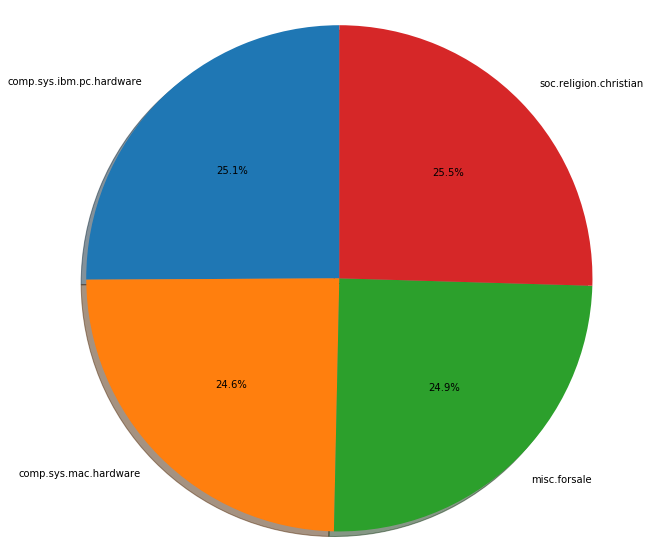

In [35]:
category_item_count_multi = [len(fetch_20newsgroups(categories = [name])['data']) for name in target_names_multi]

#plt.figure(figsize = (10,10))
fig, ax = plt.subplots(figsize = (10,10))
ax.pie(category_item_count_multi, labels=target_names_multi, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Text(0.5, 0, 'number of training documents')

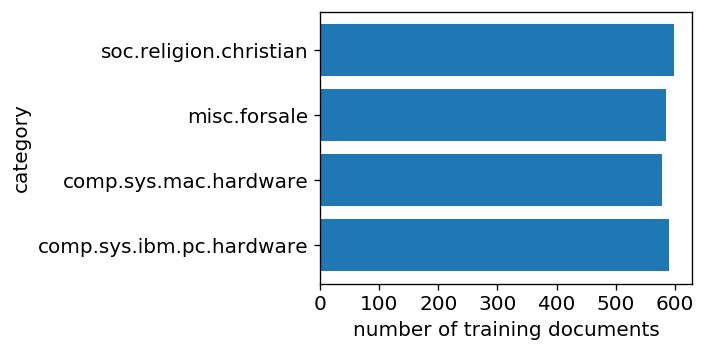

In [36]:
#plot histogram
plt.figure(figsize=(4,3),dpi=120)
plt.hist(train_dataset_multi['target'],bins=np.arange(5)-0.5,orientation='horizontal',align='mid',rwidth=0.8)
plt.yticks(np.unique(train_dataset_multi['target']),train_dataset_multi['target_names'],fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('category',fontsize=12)
plt.xlabel('number of training documents',fontsize=12)

In [37]:
vectorizer

CountVectorizer(analyzer=<function remove_num at 0x00000297CE6AF708>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [38]:
X_train_count_multi = vectorizer.fit_transform(train_dataset_multi.data)
X_train_tfidf_multi = tfidf_transformer.fit_transform(X_train_count_multi)
X_test_tfidf_multi = tfidf_transformer.transform(vectorizer.transform(test_dataset_multi.data))
print(X_train_tfidf_multi.shape)
print(X_test_tfidf_multi.shape)

(2352, 8699)
(1565, 8699)


In [39]:
svd_multi = TruncatedSVD(n_components=50, random_state=42)
X_train_reduced_lsi_multi = svd_multi.fit_transform(X_train_tfidf_multi)
X_train_recon_lsi_multi = svd_multi.inverse_transform(X_train_reduced_lsi_multi)
residual_LSI_multi = LA.norm(X_train_tfidf_multi - X_train_recon_lsi_multi)**2 # note LA norm is square root of what we want
print(residual_LSI_multi)

1806.7414144077911


In [40]:
X_test_reduced_lsi_multi = svd_multi.transform(X_test_tfidf_multi)
print(X_test_reduced_lsi_multi.shape)

(1565, 50)


In [41]:
NMF_model_multi = NMF(n_components=50, init='random', random_state=42)
X_train_reduced_NMF_multi = NMF_model_multi.fit_transform(X_train_tfidf_multi)
X_train_recon_NMF_multi = NMF_model_multi.inverse_transform(X_train_reduced_NMF_multi)
residual_NMF_multi = LA.norm(X_train_tfidf_multi-X_train_recon_NMF_multi)**2 # note LA norm is square root of what we want
print(residual_NMF_multi) # slighty larger variance

1838.1137965352993


In [42]:
X_test_reduced_NMF_multi = NMF_model_multi.transform(X_test_tfidf_multi)
print(X_test_reduced_NMF_multi.shape)

(1565, 50)


In [43]:
Y_train_label_multi = train_dataset_multi.target
Y_test_label_multi = test_dataset_multi.target
print(np.unique(Y_train_label_multi))

[0 1 2 3]


In [44]:
def plot_confM_multi(Estimator,X_test,Y_test,class_names):
    disp = plot_confusion_matrix(Estimator, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 display_labels=class_names,
                                 normalize=None,xticks_rotation=90,values_format='d')
    disp.ax_.set_title('Confusion Matrix')
    
def confusion_matrix_parameters_multi(true_label,predicted_label):
    print('Accuracy:', metrics.accuracy_score(true_label, predicted_label))
    print('Precision:', metrics.precision_score(true_label, predicted_label,average='micro'))
    print('Recall:', metrics.recall_score(true_label, predicted_label,average='micro'))
    print('F1:', metrics.f1_score(true_label, predicted_label,average='micro'))

Accuracy: 0.7424920127795527
Precision: 0.7424920127795527
Recall: 0.7424920127795527
F1: 0.7424920127795528


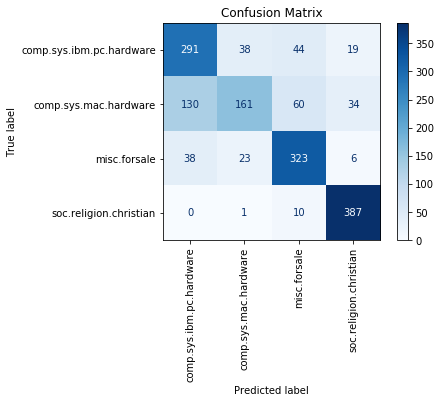

In [45]:
# Multiclass NaiveBayes and LSI
gnb_lsi_multi=GNB()

gnb_lsi_multi.fit(X_train_reduced_lsi_multi,Y_train_label_multi)
scores_gnb_lsi_multi=gnb_lsi_multi.predict_log_proba(X_test_reduced_lsi_multi)[:,1]
pred_gnb_lsi_multi=gnb_lsi_multi.predict(X_test_reduced_lsi_multi)

# plot_roc(Y_test_label_multi,scores_gnb_lsi_multi) #roc

plot_confM_multi(gnb_lsi_multi,X_test_reduced_lsi_multi,Y_test_label_multi,categories_multi) #confusion matrix

confusion_matrix_parameters_multi(Y_test_label_multi,pred_gnb_lsi_multi)

Accuracy: 0.7654952076677316
Precision: 0.7654952076677316
Recall: 0.7654952076677316
F1: 0.7654952076677316


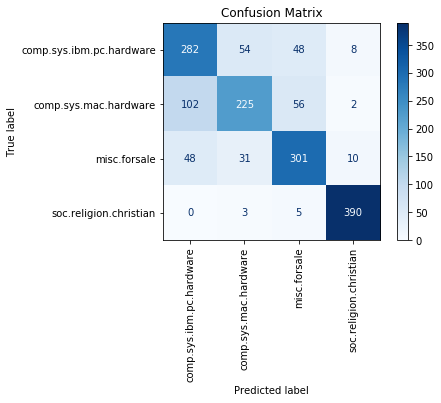

In [46]:
# Multiclass NaiveBayes and NMF
gnb_NMF_multi=GNB()

gnb_NMF_multi.fit(X_train_reduced_NMF_multi,Y_train_label_multi)
scores_gnb_NMF_multi=gnb_NMF_multi.predict_log_proba(X_test_reduced_NMF_multi)[:,1]
pred_gnb_NMF_multi=gnb_NMF_multi.predict(X_test_reduced_NMF_multi)

# plot_roc(Y_test_label_multi,scores_gnb_lsi_multi) #roc

plot_confM_multi(gnb_NMF_multi,X_test_reduced_NMF_multi,Y_test_label_multi,categories_multi) #confusion matrix

confusion_matrix_parameters_multi(Y_test_label_multi,pred_gnb_NMF_multi)

Accuracy: 0.8869009584664537
Precision: 0.8869009584664537
Recall: 0.8869009584664537
F1: 0.8869009584664537


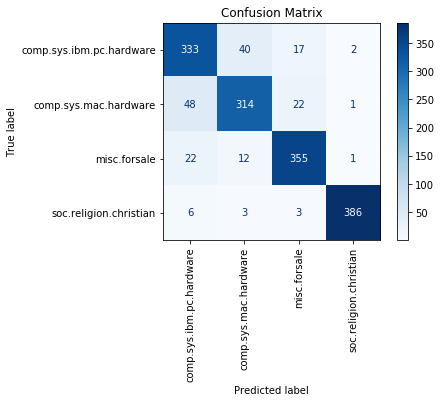

In [47]:
# Multiclass SVM onevsone and LSI
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
ovo_lsi_multi=OneVsOneClassifier(SVC(random_state=42))

ovo_lsi_multi.fit(X_train_reduced_lsi_multi,Y_train_label_multi)
# scores_ovo_lsi_multi=ovo_lsi_multi.predict_log_proba(X_test_reduced_lsi_multi)[:,1]
pred_ovo_lsi_multi=ovo_lsi_multi.predict(X_test_reduced_lsi_multi)

# plot_roc(Y_test_label_multi,scores_gnb_lsi_multi) #roc

plot_confM_multi(ovo_lsi_multi,X_test_reduced_lsi_multi,Y_test_label_multi,categories_multi) #confusion matrix

confusion_matrix_parameters_multi(Y_test_label_multi,pred_ovo_lsi_multi)

Accuracy: 0.8198083067092652
Precision: 0.8198083067092652
Recall: 0.8198083067092652
F1: 0.8198083067092652


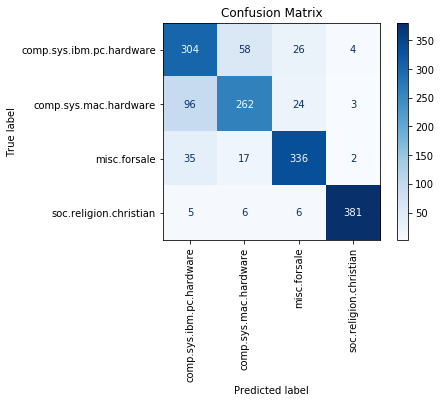

In [48]:
# Multiclass SVM onevsone and NMF

ovo_NMF_multi=OneVsOneClassifier(SVC(random_state=42))

ovo_NMF_multi.fit(X_train_reduced_NMF_multi,Y_train_label_multi)
# scores_ovo_lsi_multi=ovo_lsi_multi.predict_log_proba(X_test_reduced_lsi_multi)[:,1]
pred_ovo_NMF_multi=ovo_NMF_multi.predict(X_test_reduced_NMF_multi)

# plot_roc(Y_test_label_multi,scores_gnb_lsi_multi) #roc

plot_confM_multi(ovo_NMF_multi,X_test_reduced_NMF_multi,Y_test_label_multi,categories_multi) #confusion matrix

confusion_matrix_parameters_multi(Y_test_label_multi,pred_ovo_NMF_multi)

Accuracy: 0.8875399361022365
Precision: 0.8875399361022365
Recall: 0.8875399361022365
F1: 0.8875399361022365


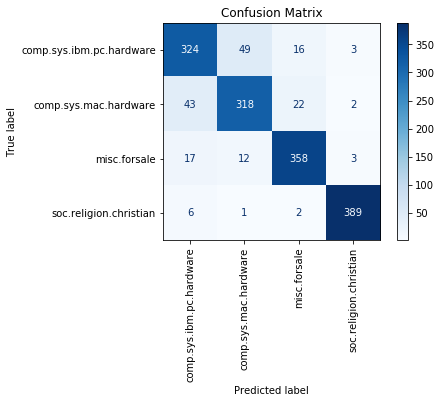

In [49]:
# Multiclass SVM onevsrest and LSI

ovr_lsi_multi=OneVsRestClassifier(SVC(random_state=42))

ovr_lsi_multi.fit(X_train_reduced_lsi_multi,Y_train_label_multi)
# scores_ovo_lsi_multi=ovo_lsi_multi.predict_log_proba(X_test_reduced_lsi_multi)[:,1]
pred_ovr_lsi_multi=ovr_lsi_multi.predict(X_test_reduced_lsi_multi)

# plot_roc(Y_test_label_multi,scores_gnb_lsi_multi) #roc

plot_confM_multi(ovr_lsi_multi,X_test_reduced_lsi_multi,Y_test_label_multi,categories_multi) #confusion matrix

confusion_matrix_parameters_multi(Y_test_label_multi,pred_ovr_lsi_multi)

Accuracy: 0.8300319488817891
Precision: 0.8300319488817891
Recall: 0.8300319488817891
F1: 0.8300319488817891


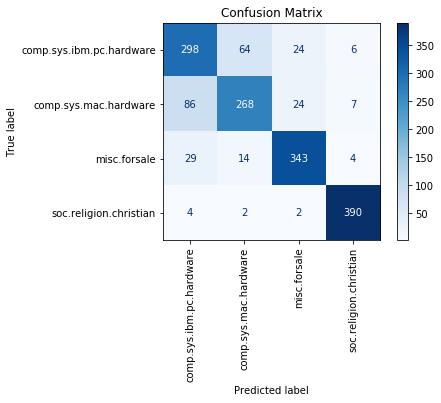

In [50]:
# Multiclass SVM onevsrest and NMF

ovr_NMF_multi=OneVsRestClassifier(SVC(random_state=42))

ovr_NMF_multi.fit(X_train_reduced_NMF_multi,Y_train_label_multi)
# scores_ovo_lsi_multi=ovo_lsi_multi.predict_log_proba(X_test_reduced_lsi_multi)[:,1]
pred_ovr_NMF_multi=ovr_NMF_multi.predict(X_test_reduced_NMF_multi)

# plot_roc(Y_test_label_multi,scores_gnb_lsi_multi) #roc

plot_confM_multi(ovr_NMF_multi,X_test_reduced_NMF_multi,Y_test_label_multi,categories_multi) #confusion matrix

confusion_matrix_parameters_multi(Y_test_label_multi,pred_ovr_NMF_multi)